<a href="https://colab.research.google.com/github/Ben-tech254/Classification-ML-models/blob/main/Breast_Cancer_prediction_using_K_NEAREST_NEIGHBORS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import os

In [7]:
#Importing the zip file of the dataset
os.environ['KAGGLE_USERNAME'] = 'USERNAME'
os.environ['KAGGLE_KEY'] = 'KEY'
!kaggle datasets download -d merishnasuwal/breast-cancer-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset
License(s): other


In [8]:
#Unzipping the zip file of the dataset
!unzip /content/breast-cancer-prediction-dataset.zip

Archive:  /content/breast-cancer-prediction-dataset.zip
  inflating: Breast_cancer_data.csv  


In [9]:
#Reading and loading the dataset
cancer_data = pd.read_csv('/content/Breast_cancer_data.csv')
cancer_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [10]:
#Information of the dataset
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [11]:
#Statistical analysis
cancer_data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [12]:
#Check for missing values
cancer_data.isnull().sum()

,0
mean_radius,0
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,0
diagnosis,0


In [13]:
#Check for duplicate values
cancer_data.duplicated().sum()

np.int64(0)

In [15]:
#Separating features from the value
x = cancer_data.drop('diagnosis', axis = 1)
y = cancer_data['diagnosis']

#Splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 5) (171, 5)
(398,) (171,)


In [16]:
#Scaling the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
#Training the model
model = KNeighborsClassifier()
model.fit(x_train, y_train)

#Prediction
model_predict = model.predict(x_test)

In [26]:
#Evaluation of the model
accuracy = accuracy_score(y_test, model_predict)
precision = precision_score(y_test, model_predict)
recall = recall_score(y_test, model_predict)
f1 = f1_score(y_test, model_predict)

print('Accuracy of K-Nearest Neighbors: ', accuracy)
print('Precision of K-Nearest Neighbors: ', precision)
print('Recall of K-Nearest Neighbors: ', recall)
print('F1 Score of K-Nearest Neighbors: ', f1)

Accuracy of K-Nearest Neighbors:  0.9298245614035088
Precision of K-Nearest Neighbors:  0.9285714285714286
Recall of K-Nearest Neighbors:  0.9629629629629629
F1 Score of K-Nearest Neighbors:  0.9454545454545454


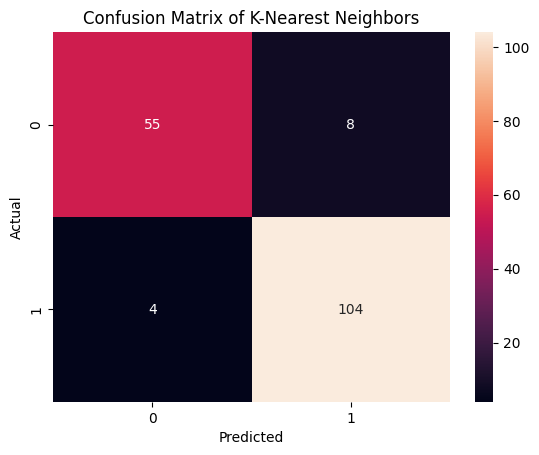

In [25]:
#Visualizing the confusion matrix using a heatmap
cm = confusion_matrix(y_test, model_predict)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix of K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
#Training the model
model_log = LogisticRegression()
model_log.fit(x_train, y_train)

#Prediction
model_log_predict = model_log.predict(x_test)

In [23]:
#Evaluation of the model
accuracy_log = accuracy_score(y_test, model_log_predict)
precision_log = precision_score(y_test, model_log_predict)
recall_log = recall_score(y_test, model_log_predict)
f1_log = f1_score(y_test, model_log_predict)

print('Accuracy of Logistic regression: ', accuracy_log)
print('Precision of Logistic regression: ', precision_log)
print('Recall of Logistic regression: ', recall_log)
print('F1 Score of Logistic regression: ', f1_log)

Accuracy of Logistic regression:  0.9473684210526315
Precision of Logistic regression:  0.9626168224299065
Recall of Logistic regression:  0.9537037037037037
F1 Score of Logistic regression:  0.958139534883721


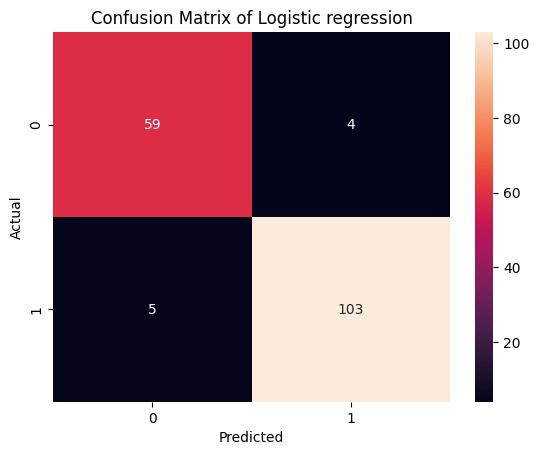

In [24]:
#Visualizing the confusion matrix using a heatmap
cm_log = confusion_matrix(y_test, model_log_predict)
sns.heatmap(cm_log, annot = True, fmt = 'd')
plt.title('Confusion Matrix of Logistic regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()